# MACS 30200

PS1 Part 1

Jie Heng

4/15/2018

## Part 1 

###  1.1 	Describe how to access data, where it is stored, who curates it. Make sure to use the original source and curator in addition to the NBER site to which I have linked

The data set is stored on the website of Chicago data portal in the catelog of health and human services, which
is curated by the Chicago Department of Public Health. The data is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP).

### 1.2 Cite other key papers that have used this data.

Several studies utilized food inspection data of Chicago. Dworkin, Liu and their collegues (2012) studied the Spanish-speaking and English-speaking people's food safety knowlege, utilizing the food inspectation data to grade the local restaturants. Liu and Manes(2013) utilize the food inspectation data to study the food safety issue in surburban Chicago. In 2014, Liu, Manes and their colleagues analyzes the relations between restaurant's food safety score and restaurant's manager. Recently, Aavik, McBride and their collegues(2018) conducts a study using this data set to buid a Chicago’s food inspection forecasting model. 

### 1.3 Describe how the data were collected.

The Food Protection Division of the Chicago Department of Public Health (CDPH) is responsible for conducting food inspectation of restaurants in Chicago. The stuff of Chicago Department of Public Health’s Food Protection Program conducts inspectation of retail food establishments with CDPH's license in Chicago, such as restaurants, grocery stores, bakeries, convenience stores, hospitals, nursing homes, day care facilities, shelters, schools, and temporary food service events. Inspections focus on food handling practices, product temperatures, personal hygiene, facility maintenance, and pest control. The department operates under the ordinances of the City of Chicago’s Municipal Code, chapters 4-8, 7-38, 7-40, and 7-42 and the Chicago Board of Health Rules and Regulations. Stuff records the basic information of food establishments (address, name, license and type), inspectation results (risk score, whehter pass the inspectation and violation information) and some information of inspectation as well (inspectator's ID, the date and type of inspectation).

### 1.4 Include a table that gives descriptive statistics for at least 8 key variables (you can do more).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("Food_Inspections.csv")
food = data.dropna()
col1 = ['Zip', 'Latitude', 'Longitude']
col2 = ['Results', 'Inspection Type', 'Results', 'Violations', 'Risk']

In [5]:
food[col1].describe()

,Zip,Latitude,Longitude
count,131735.000000,131735.000000,131735.000000
mean,60629.421057,41.879988,-87.676971
std,19.129261,0.081867,0.059551
min,60501.000000,41.644670,-87.914428
25%,60614.000000,41.827328,-87.708230
50%,60625.000000,41.891279,-87.666865
75%,60643.000000,41.939829,-87.634799
max,60827.000000,42.021064,-87.525094


In [6]:
food[col2].describe()

,Results,Inspection Type,Results,Violations,Risk
count,131735,131735,131735,131735,131735
unique,6,57,6,130577,3
top,Pass,Canvass,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,Risk 1 (High)
freq,86845,67335,86845,38,97600


### 1.5 Include at least one key visualization of the data that exhibits an interesting characteristic.

In [7]:
food['Results'].unique()

array(['Pass w/ Conditions', 'Pass', 'Fail', 'No Entry', 'Not Ready',
       'Out of Business'], dtype=object)

In [8]:
r = food['Results'].value_counts()

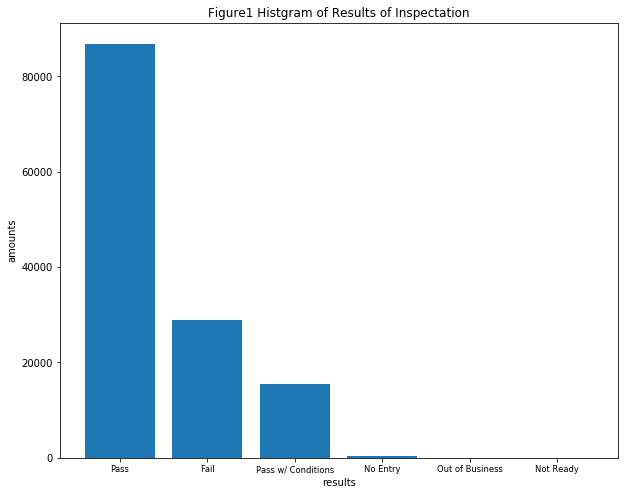

In [9]:
myresult = pd.Series(r)
plt.figure(figsize=(10,8))
plt.title('Figure1 Histgram of Results of Inspectation')
plt.xlabel('results')
plt.ylabel('amounts')
plt.bar(range(len(myresult)), myresult.values, align='center')
plt.xticks(range(len(myresult)), myresult.index.values, size='small')
plt.show()

From the histgram we know that the majority of food establishements pass the food inspectation

### 1.6 Show at least one conditional (slice) description of the data (e.g., all variable descriptive statistics by nationality of survey respondent). This can be a table or visualization.

Here, I am curious the distributions of restaurants that pass the inspectation and fail the inspectations.

In [10]:
food_short = food[['Zip','Results']]
filter1 = food_short['Results'] == 'Pass'
filter2 = food_short['Results'] == 'Fail'
mypass = food_short[filter1]
myfail = food_short[filter2]
final_pass = pd.DataFrame(mypass.groupby(['Zip']).count())
final_fail = pd.DataFrame(myfail.groupby(['Zip']).count())
final_pass.to_csv('pass.csv')
final_fail.to_csv('fail.csv')

The following is a geographic distribution map produced by 'pass.csv' using Tableau. It shows that there are more food establishements passed the inspections in the north of Chicago, especially in 60618, 60647,60614, 60657, 60639 and 60608.

<img src="pass.jpg" width="500">

Using Tableau and 'fail.csv', I plot another geographic distribution of restaurants that failed the inspections by Zip codes. Failed restaurants are centered in the middle and north areas of Chicago. 

<img src="fail.jpg" width="500">

### 1.7 The above requirements are the minimum. Feel free to go beyond these if you feel you can describe some interesting characteristics of the data.

In [11]:
food_geo = food[['Risk', 'Latitude', 'Longitude']]
filterr1 = food_geo['Risk'] == 'Risk 1 (High)'
filterr2 = food_geo['Risk'] == 'Risk 2 (Medium)'
filterr3 = food_geo['Risk'] == 'Risk 3 (Low)'
risk1 = food_geo[filterr1]
risk2 = food_geo[filterr2]
risk3 = food_geo[filterr3]
risk1.to_csv('risk1.csv')
risk2.to_csv('risk2.csv')
risk3.to_csv('risk3.csv')

<img src="risk.jpg" width="700">

The above plot shows that the risk level for most restaurants is level 1, which might be a good news for residents. And the majority of restaurants that have risks are along the lakeshore and in the north of Chicago.